# **Data Manipulation**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#The dataset 'chronic_kidney_disease.arff' has the following problems.
#It contains tabs.
#Two tuples have anomalies in them. One of them has extra space and the other one has an extra ','.

In [ ]:
dt = pd.read_csv("csv_result-.csv", on_bad_lines='skip')
dt

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
dt.columns.rename
dt.columns = ['id','age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc',
       'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',
       'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'class']

In [ ]:
dt

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,None
399,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,...,6800,6.1,no,no,no,good,no,no,notckd,None
400,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df.drop(no_name, axis = 1, inplace = True)
dt=df.drop([df.index[400], df.index[401]])

In [ ]:
dt.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [ ]:
dt.describe()

,id
count,397.000000
mean,200.722922
std,115.374484
min,1.000000
25%,102.000000
50%,201.000000
75%,300.000000
max,400.000000


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      397 non-null    int64 
 1   age     397 non-null    object
 2   bp      397 non-null    object
 3   sg      397 non-null    object
 4   al      397 non-null    object
 5   su      397 non-null    object
 6   rbc     397 non-null    object
 7   pc      397 non-null    object
 8   pcc     397 non-null    object
 9   ba      397 non-null    object
 10  bgr     397 non-null    object
 11  bu      397 non-null    object
 12  sc      397 non-null    object
 13  sod     397 non-null    object
 14  pot     397 non-null    object
 15  hemo    397 non-null    object
 16  pcv     397 non-null    object
 17  wbcc    397 non-null    object
 18  rbcc    397 non-null    object
 19  htn     397 non-null    object
 20  dm      397 non-null    object
 21  cad     397 non-null    object
 22  appet   397 non-null    ob

In [ ]:
cat_cols = [col for col in dt.columns if dt[col].dtype == 'object']
num_cols = [col for col in dt.columns if dt[col].dtype != 'object']


In [ ]:
for col in cat_cols:
  print(f"{col} has {dt[col].unique()} values\n")
for col in num_cols:
  print(f"{col} has {dt[col].unique()} values\n")

age has ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '56' '5' '74' '38' '58' '71' '34' '17' '12' '43'
 '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '64' '6' '32'
 '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28' '22'
 '79'] values

bp has ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120'] values

sg has ['1.020' '1.010' '1.005' '1.015' '?' '1.025'] values

al has ['1' '4' '2' '3' '0' '?' '5'] values

su has ['0' '3' '4' '1' '?' '2' '5'] values

rbc has ['?' 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' '?'] values

pcc has ['notpresent' 'present' '?'] values

ba has ['notpresent' 'present' '?'] values

bgr has ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '270' '92' '137' '204' '

In [ ]:
# replace incorrect values
dt['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dt['cad'] = dt['cad'].replace(to_replace = '\tno', value='no')

dt['class'] = dt['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd','no': 'not ckd'})

dt['pcv'] = dt['pcv'].replace(to_replace = {'\t?': '?', '\t43': '43'})

dt['wbcc'] = dt['wbcc'].replace(to_replace = {'\t6200': '6200', '\t8400': '8400','\t?':'?'})

dt['rbcc'] = dt['rbcc'].replace(to_replace = {'\t?':'?'})


In [ ]:
# converting necessary columns to numerical type
dt['pcv'] = pd.to_numeric(dt['pcv'], errors='coerce')
dt['age'] = pd.to_numeric(dt['age'], errors='coerce')
dt['bp'] = pd.to_numeric(dt['bp'], errors='coerce')
dt['sg'] = pd.to_numeric(dt['sg'], errors='coerce')
dt['al'] = pd.to_numeric(dt['al'], errors='coerce')
dt['su'] = pd.to_numeric(dt['su'], errors='coerce')
dt['bgr'] = pd.to_numeric(dt['bgr'], errors='coerce')
dt['bu'] = pd.to_numeric(dt['bu'], errors='coerce')
dt['sc'] = pd.to_numeric(dt['sc'], errors='coerce')
dt['sod'] = pd.to_numeric(dt['sod'], errors='coerce')
dt['pot'] = pd.to_numeric(dt['pot'], errors='coerce')
dt['hemo'] = pd.to_numeric(dt['hemo'], errors='coerce')
dt['wbcc'] = pd.to_numeric(dt['wbcc'], errors='coerce')
dt['rbcc'] = pd.to_numeric(dt['rbcc'], errors='coerce')
dt['class'] = dt['class'].map({'ckd': 0, 'not ckd': 1})
dt['class'] = pd.to_numeric(dt['class'], errors='coerce')

In [ ]:
dt.replace('?', np.NaN, inplace=True)

In [ ]:
cat_cols = [col for col in dt.columns if dt[col].dtype == 'object']
num_cols = [col for col in dt.columns if dt[col].dtype != 'object']

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      397 non-null    int64  
 1   age     388 non-null    float64
 2   bp      385 non-null    float64
 3   sg      350 non-null    float64
 4   al      351 non-null    float64
 5   su      348 non-null    float64
 6   rbc     247 non-null    object 
 7   pc      332 non-null    object 
 8   pcc     393 non-null    object 
 9   ba      393 non-null    object 
 10  bgr     354 non-null    float64
 11  bu      378 non-null    float64
 12  sc      380 non-null    float64
 13  sod     312 non-null    float64
 14  pot     311 non-null    float64
 15  hemo    345 non-null    float64
 16  pcv     327 non-null    float64
 17  wbcc    292 non-null    float64
 18  rbcc    267 non-null    float64
 19  htn     395 non-null    object 
 20  dm      395 non-null    object 
 21  cad     395 non-null    object 
 22  ap

In [ ]:
for col in cat_cols:
    print(f"{col} has {dt[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values



In [ ]:
dt.isna().sum().sort_values(ascending = False)

rbc      150
rbcc     130
wbcc     105
pot       86
sod       85
pcv       70
pc        65
hemo      52
su        49
sg        47
al        46
bgr       43
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
ane        1
appet      1
pe         1
id         0
class      0
dtype: int64

In [ ]:
# Let's impute Nan Values with median in numeric features
for col in num_cols:
    dt[col]=dt[col].fillna(dt[col].median())

In [ ]:
for col in cat_cols:
    print(f" {col} most frequent value is {dt[col].mode()}\n")

 rbc most frequent value is 0    normal
dtype: object

 pc most frequent value is 0    normal
dtype: object

 pcc most frequent value is 0    notpresent
dtype: object

 ba most frequent value is 0    notpresent
dtype: object

 htn most frequent value is 0    no
dtype: object

 dm most frequent value is 0    no
dtype: object

 cad most frequent value is 0    no
dtype: object

 appet most frequent value is 0    good
dtype: object

 pe most frequent value is 0    no
dtype: object

 ane most frequent value is 0    no
dtype: object



In [ ]:
dt['rbc'].fillna('normal',inplace=True)
dt["pc"].fillna("normal",inplace=True)
dt['pcc'].fillna('notpresent',inplace=True)
dt["ba"].fillna("notpresent",inplace=True)
dt["htn"].fillna("no",inplace=True)
dt['dm'].fillna('no',inplace=True)
dt["cad"].fillna('no',inplace=True)
dt["appet"].fillna("good",inplace=True)
dt['pe'].fillna('no',inplace=True)
dt['ane'].fillna('no',inplace=True)

In [ ]:
for col in cat_cols:
    print(f"{col} has {dt[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for col in cat_cols:
    dt[col]=le.fit_transform(dt[col])

# **modeling**

In [ ]:
to_drop = [col for col in dt if (dt[col].value_counts(normalize= True).max()) > 0.8 ]

print("{} dependent variables to be removed.".format(len(to_drop)))

8 dependent variables to be removed.


In [ ]:

#K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

**Naive Bayes without CFS**

In [ ]:
X=dt[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane',]]
y=dt['class']  

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [ ]:
#import numpy as np
#from sklearn.model_selection import cross_val_score
#results=cross_val_score(GaussianNB(),X_train,y_train,cv=10)
#print(np.mean(results))
#nbs=np.mean(results)


In [ ]:
from sklearn.model_selection import cross_val_score
# run NB with 10-fold cross validation
gnb =  GaussianNB()
score1 = cross_validation(gnb, X, y, 5)
print(score1)

In [ ]:
k1=score1['Mean Training Accuracy']/100
print('accuracy: ',k1)
k11=score1['Mean Training Recall']
print('Recall: ',k11)
k12=score1['Mean Training Precision']
print('Precision :',k12)
k13=score1['Mean Training F1 Score']
print('F1 score :',k13)

**KNN without CFS**

Text(0, 0.5, 'Erreur')

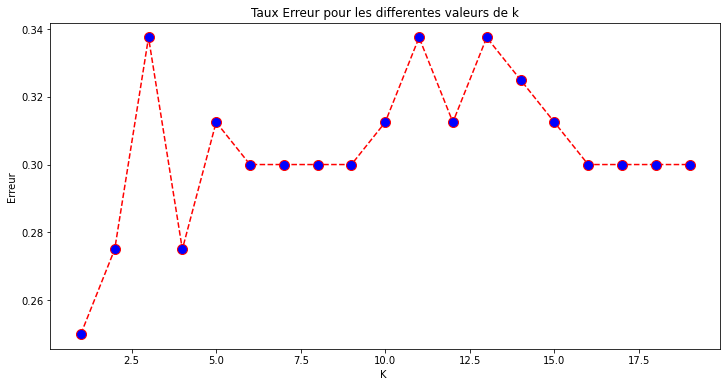

In [ ]:
error = []
# Calculer l'erreur pour k entre 1 et 40 

#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [ ]:
from sklearn.model_selection import cross_val_score
# run NB with 10-fold cross validation
gnb =  KNeighborsClassifier(n_neighbors =1)
score2 = cross_validation(gnb, X, y, 10)
print(score2)

In [ ]:
k2=score2['Mean Training Accuracy']/100
print('accuracy: ',k2)
k21=score2['Mean Training Recall']
print('Recall :',k21)
k22=score2['Mean Training Precision']
print('precision: ',k22)
k23=score2['Mean Training F1 Score']
print('F1 score :',k23)

accuracy:  0.8667840320485736
Recall : 0.8240187949143172
precision:  0.8216918863650713
F1 score : 0.8226898006238127


**SVM without CFS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='linear')
score3 = cross_validation(svc, X, y, 10)
print(score3)

In [ ]:
k3=score3['Mean Training Accuracy']/100
print('accuracy: ',k3)
k31=score3['Mean Training Recall']
print('Recall :',k31)
k32=score3['Mean Training Precision']
print('Precision :',k32)
k33=score3['Mean Training F1 Score']
print('F1 score :',k33)

accuracy:  0.9784509334460041
Recall : 0.9701713653952458
Precision : 0.9725849070984965
F1 score : 0.9712806314656799


**Naive Bayes with CFS**

In [ ]:
X1=dt[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'appet']]
y1=dt['class']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.2,random_state=0)


from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
# run NB with 10-fold cross validation
gnb = GaussianNB()
score4 = cross_validation(gnb, X1, y1, 10)
print(score4)

In [ ]:
k4=score4['Mean Training Accuracy']/100
print('accuracy: ',k4)
k41=score4['Mean Training Recall']
print('Recall :',k41)
k42=score4['Mean Training Precision']
print('Precision :',k42)
k43=score4['Mean Training F1 Score']
print('F1 score :',k43)

accuracy:  0.9596951629813937
Recall : 1.0
Precision : 0.9032053665560955
F1 score : 0.9490943765650268


**KNN with CFS**

Text(0, 0.5, 'Erreur')

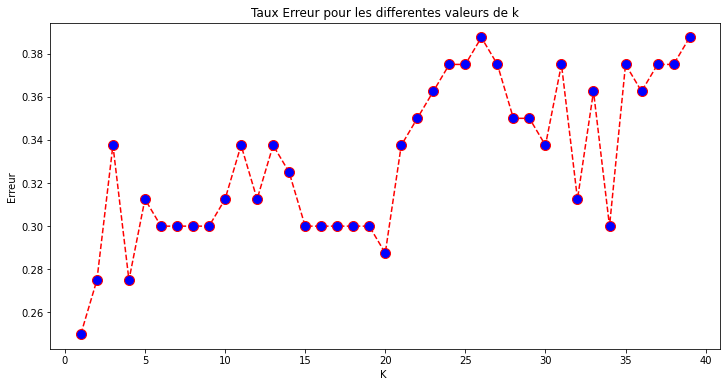

In [ ]:
error = []
# Calculer l'erreur pour k entre 1 et 40 

#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X1_train, y1_train)
    pred_i = knn_model.predict(X1_test)
    error.append(np.mean(pred_i != y1_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [ ]:
from sklearn.model_selection import cross_val_score
# run NB with 10-fold cross validation
gnb1 =  KNeighborsClassifier(n_neighbors =4)
score5 = cross_validation(gnb1, X1, y1, 10)
print(score5)

In [ ]:
k5=score5['Mean Training Accuracy']/100
print('accuracy: ',k5)
k51=score5['Mean Training Recall']
print('Recall :',k51)
k52=score5['Mean Training Precision']
print('Precision :',k52)
k53=score5['Mean Training F1 Score']
print('F1 score :',k53)

accuracy:  0.8667840320485736
Recall : 0.8240187949143172
Precision : 0.8216918863650713
F1 score : 0.8226898006238127


**SVM with CFS**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

svc = svm.SVC(kernel='linear', C=100, gamma=1, random_state=42)
score6 = cross_validation(svc, X1, y1, 10)
print(score6)

In [ ]:
k6=score6['Mean Training Accuracy']/100
print('accuracy: ',k6)
k61=score6['Mean Training Recall']
print('Recall :',k61)
k62=score6['Mean Training Precision']
print('Precision :',k62)
k63=score6['Mean Training F1 Score']
print('F1 score :',k63)

accuracy:  0.9750935010875861
Recall : 0.9753841901603094
Precision : 0.9592556105484242
F1 score : 0.9671477400322978


**Naive Bayes with CFS and adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
clf3=GaussianNB()
#adabc=AdaBoostClassifier(n_estimators=10,base_estimator=clf3,learning_rate=1)


In [ ]:
#model2 = adabc.fit(X1_train,y1_train)
#y2_pred=model2.predict(X1_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
adabc=AdaBoostClassifier(n_estimators=10,base_estimator=clf3,learning_rate=1)

# run NB with 10-fold cross validation

score7 = cross_validation(adabc, X1, y1, 10)
print(score7)

In [ ]:
k7=score7['Mean Training Accuracy']/100
print('accuracy: ',k7)
k71=score7['Mean Training Recall']
print('Recall :',k71)
k72=score7['Mean Training Precision']
print('Recall :',k72)
k73=score7['Mean Training F1 Score']
print('F1 score :',k73)
k74=score7['Mean Training Precision']
print('Precision :',k74)

accuracy:  0.9457396366367776
Recall : 0.962703150912106
Recall : 0.9268653199693648
F1 score : 0.9359313590940432
Precision : 0.9268653199693648


**SVM WITH CFS AND ADABOOST**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
# run NB with 10-fold cross validation
clf = AdaBoostClassifier(svm.SVC(probability=True,kernel='linear'),n_estimators=50, learning_rate=1.0, algorithm='SAMME')
score8 = cross_validation(clf,X1 ,y1, 3)
print(score8)

{'Training Accuracy scores': array([0.99242424, 1.        , 0.96981132]), 'Mean Training Accuracy': 98.74118543929865, 'Training Precision scores': array([0.98989899, 1.        , 0.95049505]), 'Mean Training Precision': 0.9801313464679802, 'Training Recall scores': array([0.98989899, 1.        , 0.96969697]), 'Mean Training Recall': 0.9865319865319866, 'Training F1 scores': array([0.98989899, 1.        , 0.96      ]), 'Mean Training F1 Score': 0.9832996632996633, 'Validation Accuracy scores': array([0.95488722, 0.9469697 , 0.98484848]), 'Mean Validation Accuracy': 96.22351332877649, 'Validation Precision scores': array([0.92307692, 0.92      , 0.96153846]), 'Mean Validation Precision': 0.934871794871795, 'Validation Recall scores': array([0.96      , 0.93877551, 1.        ]), 'Mean Validation Recall': 0.9662585034013605, 'Validation F1 scores': array([0.94117647, 0.92929293, 0.98039216]), 'Mean Validation F1 Score': 0.9502871855813032}


In [ ]:
k8=score8['Mean Training Accuracy']/100
print('accuracy: ',k8)
k81=score8['Mean Training Recall']
print('Recall :',k81)
k82=score8['Mean Training Precision']
print('Precision :',k82)
k83=score8['Mean Training F1 Score']
print('F1 score :',k83)
k84=score8['Mean Training Precision']
print('Precision :',k84)

accuracy:  0.9874118543929865
Recall : 0.9865319865319866
Precision : 0.9801313464679802
F1 score : 0.9832996632996633
Precision : 0.9801313464679802


In [ ]:
models = pd.DataFrame({
    'Model' : ['Naive_Bayes', 'KNN','Svm'],
    'Score' : [k1,k2,k3 ]
})


models.sort_values(by = 'Score', ascending = False)
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

evaluation with cfs

In [ ]:
models = pd.DataFrame({
    'Model' : ['Naive_Bayes+CFS','KNN+CFS','SVM+CFS'],
    'Score' : [k4,k5,k6 ]
})


models.sort_values(by = 'Score', ascending = False)
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

evaluation with cfs and adaboost

In [ ]:
models = pd.DataFrame({
    'Model' : ['Naive_Bayes+CFS+AdaBoost' ,'SVM+CFS+AdaBoost'],
    'Score' : [k7,k8 ]
})


models.sort_values(by = 'Score', ascending = False)
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [ ]:
models1 = pd.DataFrame({
    'Model' : ['Naive_Bayes', 'KNN','Svm','Naive_Bayes+CFS' ,'KNN+CFS','SVM+CFS','Naive_Bayes+CFS+AdaBoost' ,'SVM+CFS+AdaBoost'],
    'Accuracy' : [k1,k2,k3,k4,k5,k6,k7,k8 ]
})

models1 = pd.DataFrame(models1)
models1["id"]=models1.index
models1


,Model,Accuracy,id
0,Naive_Bayes,0.964726,0
1,KNN,0.866784,1
2,Svm,0.978451,2
3,Naive_Bayes+CFS,0.959695,3
4,KNN+CFS,0.866784,4
5,SVM+CFS,0.975094,5
6,Naive_Bayes+CFS+AdaBoost,0.945740,6
7,SVM+CFS+AdaBoost,0.987412,7


In [ ]:
models1.sort_values(by = 'Accuracy', ascending = False)
px.bar(data_frame = models1, x = 'Accuracy', y = 'Model', color = 'Accuracy', template = 'plotly_dark', 
       title = ' Accuracy Models Comparison')

In [ ]:

models2 = pd.DataFrame({
    'Modeles' : ['Naive_Bayes', 'KNN','Svm','Naive_Bayes+CFS' ,'KNN+CFS','SVM+CFS','Naive_Bayes+CFS+AdaBoost' ,'SVM+CFS+AdaBoost'],
    'Recall' : [k11,k21,k31,k41,k51,k61,k71,k81 ]
})
models2 = pd.DataFrame(models2)
models2["id"]=models2.index
models2


,Modeles,Recall,id
0,Naive_Bayes,1.000000,0
1,KNN,0.824019,1
2,Svm,0.970171,2
3,Naive_Bayes+CFS,1.000000,3
4,KNN+CFS,0.824019,4
5,SVM+CFS,0.975384,5
6,Naive_Bayes+CFS+AdaBoost,0.962703,6
7,SVM+CFS+AdaBoost,0.986532,7


In [ ]:
models2.sort_values(by = 'Recall', ascending = False)
px.bar(data_frame = models2, x = 'Recall', y = 'Modeles', color = 'Recall', template = 'plotly_dark', 
       title = 'Recall Models Comparison')

In [ ]:
models3 = pd.DataFrame({
    'Modeles' : ['Naive_Bayes', 'KNN','Svm','Naive_Bayes+CFS' ,'KNN+CFS','SVM+CFS','Naive_Bayes+CFS+AdaBoost' ,'SVM+CFS+AdaBoost'],
    'Precision' : [k12,k22,k32,k42,k52,k62,k72,k82 ]
})

models3 = pd.DataFrame(models3)
models3["id"]=models3.index
models3

,Modeles,Precision,id
0,Naive_Bayes,0.914311,0
1,KNN,0.821692,1
2,Svm,0.972585,2
3,Naive_Bayes+CFS,0.903205,3
4,KNN+CFS,0.821692,4
5,SVM+CFS,0.959256,5
6,Naive_Bayes+CFS+AdaBoost,0.926865,6
7,SVM+CFS+AdaBoost,0.980131,7


In [ ]:
models3.sort_values(by = 'Precision', ascending = False)
px.bar(data_frame = models3, x = 'Precision', y = 'Modeles', color = 'Precision', template = 'plotly_dark', 
       title = 'Precision Models Comparison')

In [ ]:
models4 = pd.DataFrame({
    'Modeles' : ['Naive_Bayes', 'KNN','Svm','Naive_Bayes+CFS' ,'KNN+CFS','SVM+CFS','Naive_Bayes+CFS+AdaBoost' ,'SVM+CFS+AdaBoost'],
    'F1_Scores' : [k13,k23,k33,k43,k53,k63,k73,k83 ]
})


models4 = pd.DataFrame(models4)
models4["id"]=models4.index
models4


,Modeles,F1_Scores,id
0,Naive_Bayes,0.955179,0
1,KNN,0.822690,1
2,Svm,0.971281,2
3,Naive_Bayes+CFS,0.949094,3
4,KNN+CFS,0.822690,4
5,SVM+CFS,0.967148,5
6,Naive_Bayes+CFS+AdaBoost,0.935931,6
7,SVM+CFS+AdaBoost,0.983300,7


In [ ]:
models4.sort_values(by = 'F1_Scores', ascending = False)
px.bar(data_frame = models4, x = 'F1_Scores', y = 'Modeles', color = 'F1_Scores', template = 'plotly_dark', 
       title = 'F1 Models Comparison')

In [ ]:
info= pd.merge(models1,models2,on ='id',how = "outer")
info1= pd.merge(info,models3,on ='id',how = "outer")
total_info= pd.merge(info1,models4,on ='id',how = "outer")
l=["id","Modeles_x","Modeles_y","Modeles"]
for i in l:
  total_info.drop(i,axis=1,inplace=True)




In [ ]:
 total_info
